In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from arcgis.features import GeoAccessor
import time
%matplotlib inline

In [2]:
start = time.clock()

In [3]:
sns.set_style('darkgrid')

In [4]:
toblerdistgdb = r'<PATH\TO\DATA>\ToblerDistWater.gdb'

In [5]:
paleoindian = GeoAccessor.from_featureclass(os.path.join(toblerdistgdb, 'Paleoindian_toblerDistWater'))
paleoindian['Component'] = 'Paleoindian'
earlyarchaic = GeoAccessor.from_featureclass(os.path.join(toblerdistgdb, 'EarlyArchaic_toblerDistWater'))
earlyarchaic['Component'] = 'Early Archaic'
middlearchaic = GeoAccessor.from_featureclass(os.path.join(toblerdistgdb, 'MiddleArchaic_toblerDistWater'))
middlearchaic['Component'] = 'Middle Archaic'
latearchaic = GeoAccessor.from_featureclass(os.path.join(toblerdistgdb, 'LateArchaic_toblerDistWater'))
latearchaic['Component'] = 'Late Archaic'
lateprehistoric = GeoAccessor.from_featureclass(os.path.join(toblerdistgdb, 'LatePrehistoric_toblerDistWater'))
lateprehistoric['Component'] = 'Late Prehistoric'

In [6]:
allcomponents = pd.concat([paleoindian, earlyarchaic, middlearchaic, latearchaic, lateprehistoric])

In [7]:
allcomponents.to_csv(r'<PATH\TO\OUTPUT>\AllComponents_ToblerDistWater')

In [8]:
pd.DataFrame({'Paleoindian': paleoindian['ToblerDist30m'],
             'EarlyArchaic': earlyarchaic['ToblerDist30m'],
             'MiddleArchaic': middlearchaic['ToblerDist30m'],
             'LateArchaic': latearchaic['ToblerDist30m'],
             'LatePrehistoric': lateprehistoric['ToblerDist30m']}).to_csv(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m.csv', index=False)

In [9]:
pd.DataFrame({'Paleoindian': paleoindian['ToblerDist30m_log'],
             'EarlyArchaic': earlyarchaic['ToblerDist30m_log'],
             'MiddleArchaic': middlearchaic['ToblerDist30m_log'],
             'LateArchaic': latearchaic['ToblerDist30m_log'],
             'LatePrehistoric': lateprehistoric['ToblerDist30m_log']}).to_csv(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m_log.csv', index=False)

In [10]:
pd.DataFrame({'Paleoindian': paleoindian['ToblerDist30m_log1p'],
             'EarlyArchaic': earlyarchaic['ToblerDist30m_log1p'],
             'MiddleArchaic': middlearchaic['ToblerDist30m_log1p'],
             'LateArchaic': latearchaic['ToblerDist30m_log1p'],
             'LatePrehistoric': lateprehistoric['ToblerDist30m_log1p']}).to_csv(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m_log1p.csv', index=False)

In [11]:
def plot_toblerdistwater(component_df, comp_name, barcolor, linecolor):
    fig, axs = plt.subplots(1, 3, figsize=(15,5))

    axs[0].hist(component_df['ToblerDist30m'], bins='auto', color=barcolor)
    mean = component_df['ToblerDist30m'].mean()
    stddev = component_df['ToblerDist30m'].std()
    axs[0].axvline(x=mean, color=linecolor, label='Mean: %.4f' % (mean))
    axs[0].axvline(x=mean-stddev, color=linecolor, label='SD: %.4f' % (stddev), linestyle='--')
    axs[0].axvline(x=mean+stddev, color=linecolor, linestyle='--')
    axs[0].legend()
    axs[0].set(xlabel='ToblerDist30m (hours)', ylabel='Count')

    axs[1].hist(component_df['ToblerDist30m_log1p'], bins='auto', color=barcolor)
    mean = component_df['ToblerDist30m_log1p'].mean()
    stddev = component_df['ToblerDist30m_log1p'].std()
    axs[1].axvline(x=mean, color=linecolor, label='Mean: %.4f' % (mean))
    axs[1].axvline(x=mean-stddev, color=linecolor, label='SD: %.4f' % (stddev), linestyle='--')
    axs[1].axvline(x=mean+stddev, color=linecolor, linestyle='--')
    axs[1].legend()
    axs[1].set(xlabel='ToblerDist30m (hours, log1p)')

    axs[2].hist(component_df['ToblerDist30m_log'], bins='auto', color=barcolor)
    mean = component_df['ToblerDist30m_log'].mean()
    stddev = component_df['ToblerDist30m_log'].std()
    axs[2].axvline(x=mean, color=linecolor, label='Mean: %.4f' % (mean))
    axs[2].axvline(x=mean-stddev, color=linecolor, label='SD: %.4f' % (stddev), linestyle='--')
    axs[2].axvline(x=mean+stddev, color=linecolor, linestyle='--')
    axs[2].legend()
    axs[2].set(xlabel='ToblerDist30m (hours, log)')

    fig.suptitle('{} Sites, Tobler Hiking Distance to Water'.format(comp_name), fontsize=14)
    plt.savefig(r'<PATH\TO\OUTPUT>\figs\ToblerDistWater_{}.png'.format(comp_name.replace(' ', '')), dpi=300, bbox_inches='tight')

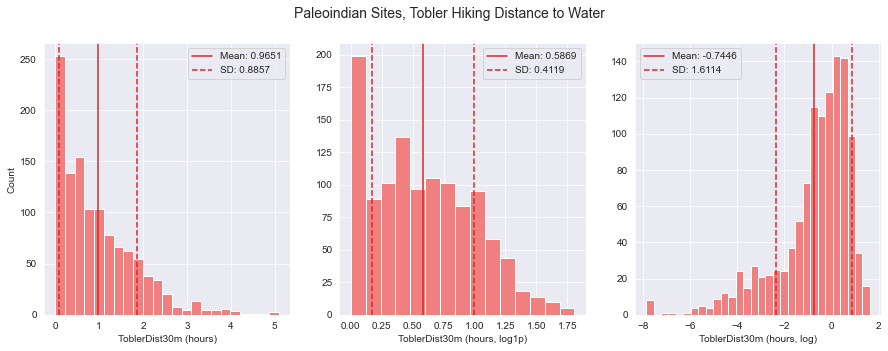

In [12]:
plot_toblerdistwater(paleoindian, 'Paleoindian', 'lightcoral', 'tab:red')

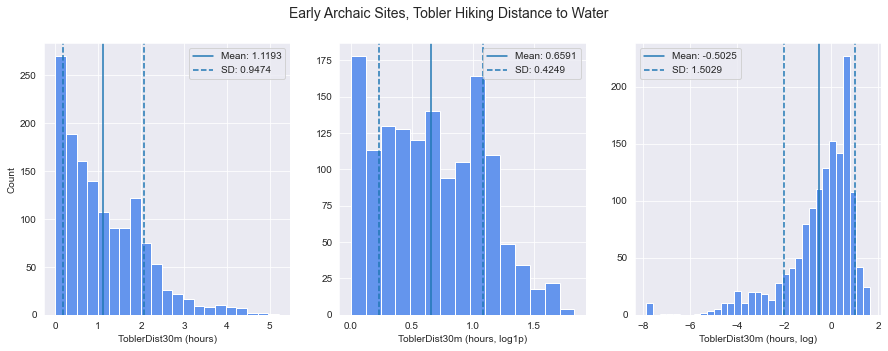

In [13]:
plot_toblerdistwater(earlyarchaic, 'Early Archaic', 'cornflowerblue', 'tab:blue')

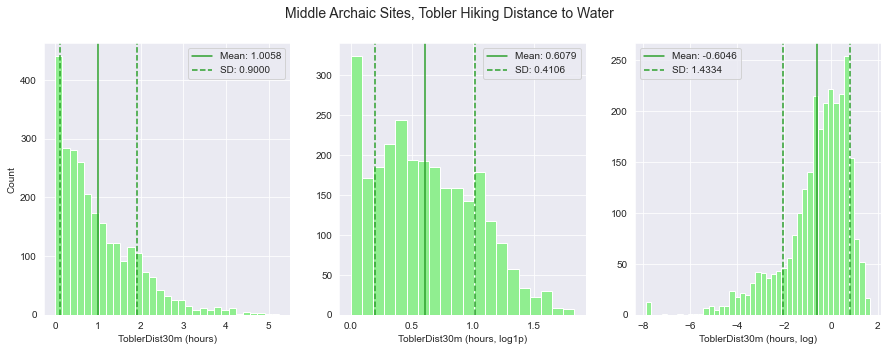

In [14]:
plot_toblerdistwater(middlearchaic, 'Middle Archaic', 'lightgreen', 'tab:green')

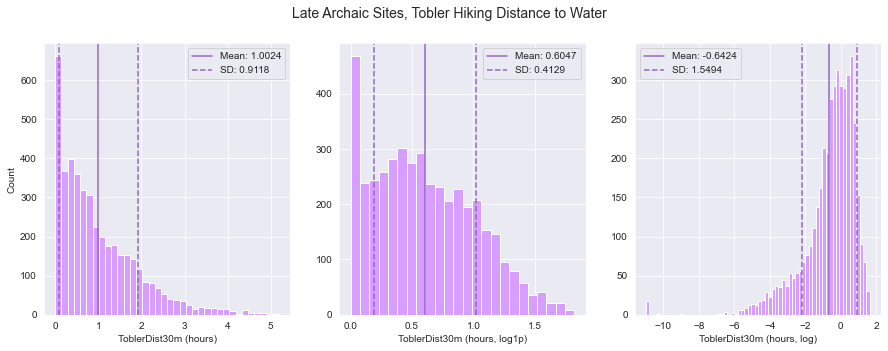

In [15]:
plot_toblerdistwater(latearchaic, 'Late Archaic', '#d89eff', 'tab:purple')

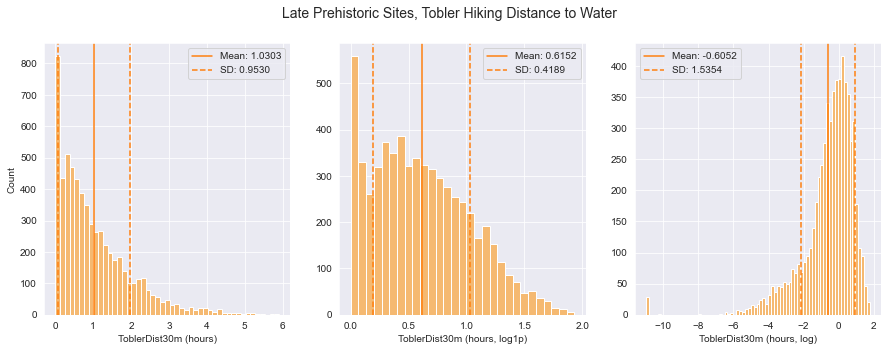

In [16]:
plot_toblerdistwater(lateprehistoric, 'Late Prehistoric', '#f5b971', 'tab:orange')

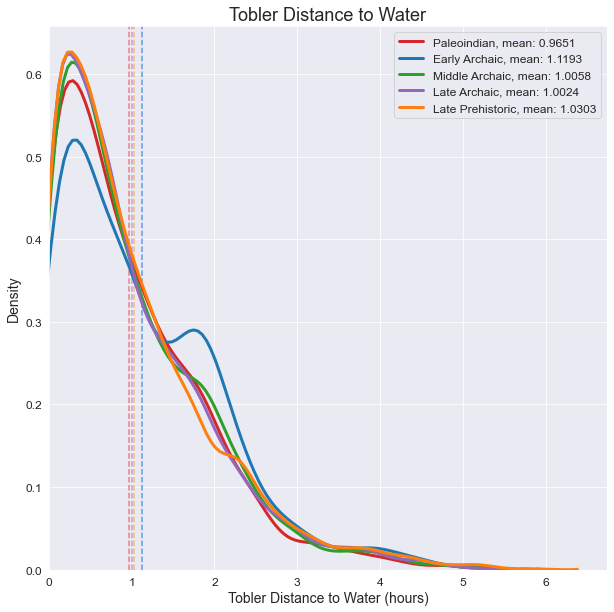

In [17]:
fig, axs = plt.subplots(figsize=(10,10))

plt.axvline(x=paleoindian['ToblerDist30m'].mean(), color='lightcoral', linestyle='--')
plt.axvline(x=earlyarchaic['ToblerDist30m'].mean(), color='cornflowerblue', linestyle='--')
plt.axvline(x=middlearchaic['ToblerDist30m'].mean(), color='lightgreen', linestyle='--')
plt.axvline(x=latearchaic['ToblerDist30m'].mean(), color='#d89eff', linestyle='--')
plt.axvline(x=lateprehistoric['ToblerDist30m'].mean(), color='#f5b971', linestyle='--')

sns.kdeplot(paleoindian['ToblerDist30m'], color='tab:red', label='Paleoindian, mean: %.4f' % (paleoindian['ToblerDist30m'].mean()), linewidth=3)
sns.kdeplot(earlyarchaic['ToblerDist30m'], color='tab:blue', label='Early Archaic, mean: %.4f' % (earlyarchaic['ToblerDist30m'].mean()), linewidth=3)
sns.kdeplot(middlearchaic['ToblerDist30m'], color='tab:green', label='Middle Archaic, mean: %.4f' % (middlearchaic['ToblerDist30m'].mean()), linewidth=3)
sns.kdeplot(latearchaic['ToblerDist30m'], color='tab:purple', label='Late Archaic, mean: %.4f' % (latearchaic['ToblerDist30m'].mean()), linewidth=3)
sns.kdeplot(lateprehistoric['ToblerDist30m'], color='tab:orange', label='Late Prehistoric, mean: %.4f' % (lateprehistoric['ToblerDist30m'].mean()), linewidth=3)

plt.title('Tobler Distance to Water', fontsize=18)
plt.xlabel('Tobler Distance to Water (hours)', fontsize=14)
plt.ylabel('Density', fontsize=14)
axs.tick_params(labelsize=12)
plt.xlim(left=0)
plt.legend(fontsize=12)
plt.savefig(r'<PATH\TO\OUTPUT>\figs\ToblerDistWater.png', dpi=300, bbox_inches='tight')

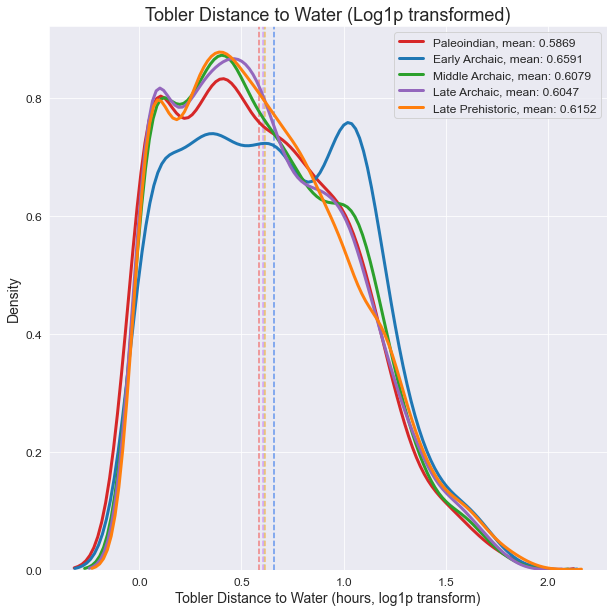

In [18]:
fig, axs = plt.subplots(figsize=(10,10))

plt.axvline(x=paleoindian['ToblerDist30m_log1p'].mean(), color='lightcoral', linestyle='--')
plt.axvline(x=earlyarchaic['ToblerDist30m_log1p'].mean(), color='cornflowerblue', linestyle='--')
plt.axvline(x=middlearchaic['ToblerDist30m_log1p'].mean(), color='lightgreen', linestyle='--')
plt.axvline(x=latearchaic['ToblerDist30m_log1p'].mean(), color='#d89eff', linestyle='--')
plt.axvline(x=lateprehistoric['ToblerDist30m_log1p'].mean(), color='#f5b971', linestyle='--')

sns.kdeplot(paleoindian['ToblerDist30m_log1p'], color='tab:red', label='Paleoindian, mean: %.4f' % (paleoindian['ToblerDist30m_log1p'].mean()), linewidth=3)
sns.kdeplot(earlyarchaic['ToblerDist30m_log1p'], color='tab:blue', label='Early Archaic, mean: %.4f' % (earlyarchaic['ToblerDist30m_log1p'].mean()), linewidth=3)
sns.kdeplot(middlearchaic['ToblerDist30m_log1p'], color='tab:green', label='Middle Archaic, mean: %.4f' % (middlearchaic['ToblerDist30m_log1p'].mean()), linewidth=3)
sns.kdeplot(latearchaic['ToblerDist30m_log1p'], color='tab:purple', label='Late Archaic, mean: %.4f' % (latearchaic['ToblerDist30m_log1p'].mean()), linewidth=3)
sns.kdeplot(lateprehistoric['ToblerDist30m_log1p'], color='tab:orange', label='Late Prehistoric, mean: %.4f' % (lateprehistoric['ToblerDist30m_log1p'].mean()), linewidth=3)

plt.title('Tobler Distance to Water (Log1p transformed)', fontsize=18)
plt.xlabel('Tobler Distance to Water (hours, log1p transform)', fontsize=14)
plt.ylabel('Density', fontsize=14)
axs.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.savefig(r'<PATH\TO\OUTPUT>\figs\ToblerDistWater_log1p.png', dpi=300, bbox_inches='tight')

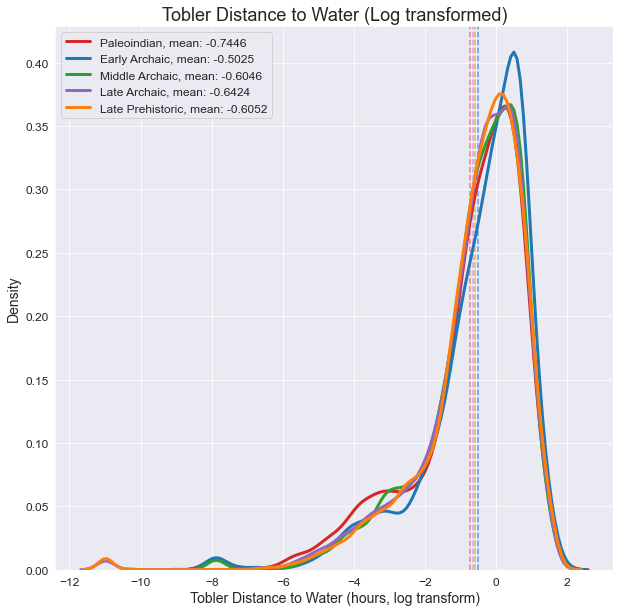

In [19]:
fig, axs = plt.subplots(figsize=(10,10))

plt.axvline(x=paleoindian['ToblerDist30m_log'].mean(), color='lightcoral', linestyle='--')
plt.axvline(x=earlyarchaic['ToblerDist30m_log'].mean(), color='cornflowerblue', linestyle='--')
plt.axvline(x=middlearchaic['ToblerDist30m_log'].mean(), color='lightgreen', linestyle='--')
plt.axvline(x=latearchaic['ToblerDist30m_log'].mean(), color='#d89eff', linestyle='--')
plt.axvline(x=lateprehistoric['ToblerDist30m_log'].mean(), color='#f5b971', linestyle='--')

sns.kdeplot(paleoindian['ToblerDist30m_log'], color='tab:red', label='Paleoindian, mean: %.4f' % (paleoindian['ToblerDist30m_log'].mean()), linewidth=3)
sns.kdeplot(earlyarchaic['ToblerDist30m_log'], color='tab:blue', label='Early Archaic, mean: %.4f' % (earlyarchaic['ToblerDist30m_log'].mean()), linewidth=3)
sns.kdeplot(middlearchaic['ToblerDist30m_log'], color='tab:green', label='Middle Archaic, mean: %.4f' % (middlearchaic['ToblerDist30m_log'].mean()), linewidth=3)
sns.kdeplot(latearchaic['ToblerDist30m_log'], color='tab:purple', label='Late Archaic, mean: %.4f' % (latearchaic['ToblerDist30m_log'].mean()), linewidth=3)
sns.kdeplot(lateprehistoric['ToblerDist30m_log'], color='tab:orange', label='Late Prehistoric, mean: %.4f' % (lateprehistoric['ToblerDist30m_log'].mean()), linewidth=3)

plt.title('Tobler Distance to Water (Log transformed)', fontsize=18)
plt.xlabel('Tobler Distance to Water (hours, log transform)', fontsize=14)
plt.ylabel('Density', fontsize=14)
axs.tick_params(labelsize=12)
plt.legend(fontsize=12)
plt.savefig(r'<PATH\TO\OUTPUT>\figs\ToblerDistWater_log.png', dpi=300, bbox_inches='tight')

No handles with labels found to put in legend.
No handles with labels found to put in legend.


Text(0.5, 0.98, 'All Components, Tobler Hiking Distance to Water')

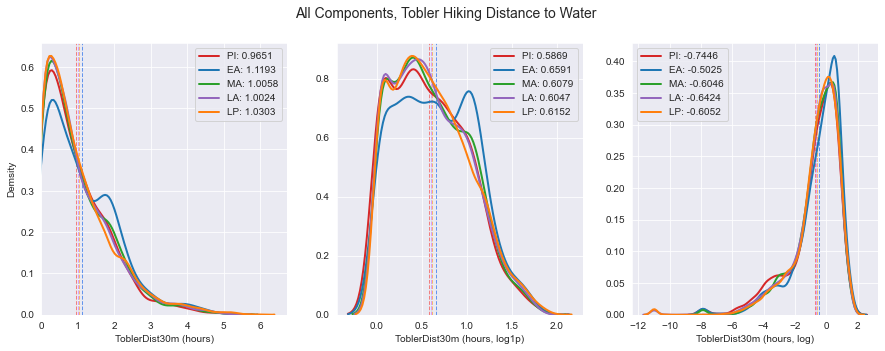

In [20]:
fig, axs = plt.subplots(1, 3, figsize=(15,5))

axs[0].axvline(x=paleoindian['ToblerDist30m'].mean(), color='lightcoral', linestyle='--', linewidth=1)
axs[0].axvline(x=earlyarchaic['ToblerDist30m'].mean(), color='cornflowerblue', linestyle='--', linewidth=1)
axs[0].axvline(x=middlearchaic['ToblerDist30m'].mean(), color='lightgreen', linestyle='--', linewidth=1)
axs[0].axvline(x=latearchaic['ToblerDist30m'].mean(), color='#d89eff', linestyle='--', linewidth=1)
axs[0].axvline(x=lateprehistoric['ToblerDist30m'].mean(), color='#f5b971', linestyle='--', linewidth=1)

sns.kdeplot(paleoindian['ToblerDist30m'], color='tab:red', label='PI: %.4f' % (paleoindian['ToblerDist30m'].mean()), linewidth=2, ax=axs[0])
sns.kdeplot(earlyarchaic['ToblerDist30m'], color='tab:blue', label='EA: %.4f' % (earlyarchaic['ToblerDist30m'].mean()), linewidth=2, ax=axs[0])
sns.kdeplot(middlearchaic['ToblerDist30m'], color='tab:green', label='MA: %.4f' % (middlearchaic['ToblerDist30m'].mean()), linewidth=2, ax=axs[0])
sns.kdeplot(latearchaic['ToblerDist30m'], color='tab:purple', label='LA: %.4f' % (latearchaic['ToblerDist30m'].mean()), linewidth=2, ax=axs[0])
sns.kdeplot(lateprehistoric['ToblerDist30m'], color='tab:orange', label='LP: %.4f' % (lateprehistoric['ToblerDist30m'].mean()), linewidth=2, ax=axs[0])

axs[0].set(xlabel='ToblerDist30m (hours)', ylabel='Demsity')
axs[0].set_xlim(left=0)
plt.legend()


axs[1].axvline(x=paleoindian['ToblerDist30m_log1p'].mean(), color='lightcoral', linestyle='--', linewidth=1)
axs[1].axvline(x=earlyarchaic['ToblerDist30m_log1p'].mean(), color='cornflowerblue', linestyle='--', linewidth=1)
axs[1].axvline(x=middlearchaic['ToblerDist30m_log1p'].mean(), color='lightgreen', linestyle='--', linewidth=1)
axs[1].axvline(x=latearchaic['ToblerDist30m_log1p'].mean(), color='#d89eff', linestyle='--', linewidth=1)
axs[1].axvline(x=lateprehistoric['ToblerDist30m_log1p'].mean(), color='#f5b971', linestyle='--', linewidth=1)

sns.kdeplot(paleoindian['ToblerDist30m_log1p'], color='tab:red', label='PI: %.4f' % (paleoindian['ToblerDist30m_log1p'].mean()), linewidth=2, ax=axs[1])
sns.kdeplot(earlyarchaic['ToblerDist30m_log1p'], color='tab:blue', label='EA: %.4f' % (earlyarchaic['ToblerDist30m_log1p'].mean()), linewidth=2, ax=axs[1])
sns.kdeplot(middlearchaic['ToblerDist30m_log1p'], color='tab:green', label='MA: %.4f' % (middlearchaic['ToblerDist30m_log1p'].mean()), linewidth=2, ax=axs[1])
sns.kdeplot(latearchaic['ToblerDist30m_log1p'], color='tab:purple', label='LA: %.4f' % (latearchaic['ToblerDist30m_log1p'].mean()), linewidth=2, ax=axs[1])
sns.kdeplot(lateprehistoric['ToblerDist30m_log1p'], color='tab:orange', label='LP: %.4f' % (lateprehistoric['ToblerDist30m_log1p'].mean()), linewidth=2, ax=axs[1])

axs[1].set(xlabel='ToblerDist30m (hours, log1p)')
plt.legend()


axs[2].axvline(x=paleoindian['ToblerDist30m_log'].mean(), color='lightcoral', linestyle='--', linewidth=1)
axs[2].axvline(x=earlyarchaic['ToblerDist30m_log'].mean(), color='cornflowerblue', linestyle='--', linewidth=1)
axs[2].axvline(x=middlearchaic['ToblerDist30m_log'].mean(), color='lightgreen', linestyle='--', linewidth=1)
axs[2].axvline(x=latearchaic['ToblerDist30m_log'].mean(), color='#d89eff', linestyle='--', linewidth=1)
axs[2].axvline(x=lateprehistoric['ToblerDist30m_log'].mean(), color='#f5b971', linestyle='--', linewidth=1)

sns.kdeplot(paleoindian['ToblerDist30m_log'], color='tab:red', label='PI: %.4f' % (paleoindian['ToblerDist30m_log'].mean()), linewidth=2, ax=axs[2])
sns.kdeplot(earlyarchaic['ToblerDist30m_log'], color='tab:blue', label='EA: %.4f' % (earlyarchaic['ToblerDist30m_log'].mean()), linewidth=2, ax=axs[2])
sns.kdeplot(middlearchaic['ToblerDist30m_log'], color='tab:green', label='MA: %.4f' % (middlearchaic['ToblerDist30m_log'].mean()), linewidth=2, ax=axs[2])
sns.kdeplot(latearchaic['ToblerDist30m_log'], color='tab:purple', label='LA: %.4f' % (latearchaic['ToblerDist30m_log'].mean()), linewidth=2, ax=axs[2])
sns.kdeplot(lateprehistoric['ToblerDist30m_log'], color='tab:orange', label='LP: %.4f' % (lateprehistoric['ToblerDist30m_log'].mean()), linewidth=2, ax=axs[2])

axs[2].set(xlabel='ToblerDist30m (hours, log)')
axs[2].legend()

fig.suptitle('All Components, Tobler Hiking Distance to Water', fontsize=14)
plt.savefig(r'<PATH\TO\OUTPUT>\figs\ToblerDistWater_allComponents.png', dpi=300, bbox_inches='tight')



In [21]:
scipy.stats.f_oneway(paleoindian['ToblerDist30m'], 
                     earlyarchaic['ToblerDist30m'], 
                     middlearchaic['ToblerDist30m'], 
                     latearchaic['ToblerDist30m'], 
                     lateprehistoric['ToblerDist30m'])

F_onewayResult(statistic=5.780399594877196, pvalue=0.00012059324028794093)

In [22]:
scipy.stats.kruskal(paleoindian['ToblerDist30m'], 
                    earlyarchaic['ToblerDist30m'], 
                    middlearchaic['ToblerDist30m'], 
                    latearchaic['ToblerDist30m'], 
                    lateprehistoric['ToblerDist30m'])

KruskalResult(statistic=23.81842740756592, pvalue=8.685483407670516e-05)

In [23]:
scipy.stats.f_oneway(paleoindian['ToblerDist30m_log'], 
                     earlyarchaic['ToblerDist30m_log'], 
                     middlearchaic['ToblerDist30m_log'], 
                     latearchaic['ToblerDist30m_log'], 
                     lateprehistoric['ToblerDist30m_log'])

F_onewayResult(statistic=4.450467048741275, pvalue=0.0013545418948939627)

In [24]:
scipy.stats.kruskal(paleoindian['ToblerDist30m_log'], 
                    earlyarchaic['ToblerDist30m_log'], 
                    middlearchaic['ToblerDist30m_log'], 
                    latearchaic['ToblerDist30m_log'], 
                    lateprehistoric['ToblerDist30m_log'])

KruskalResult(statistic=23.827420855711605, pvalue=8.649526745545487e-05)

In [25]:
scipy.stats.f_oneway(paleoindian['ToblerDist30m_log1p'], 
                     earlyarchaic['ToblerDist30m_log1p'], 
                     middlearchaic['ToblerDist30m_log1p'], 
                     latearchaic['ToblerDist30m_log1p'], 
                     lateprehistoric['ToblerDist30m_log1p'])

F_onewayResult(statistic=6.035026555521632, pvalue=7.546064156771574e-05)

In [26]:
scipy.stats.kruskal(paleoindian['ToblerDist30m_log1p'], 
                    earlyarchaic['ToblerDist30m_log1p'], 
                    middlearchaic['ToblerDist30m_log1p'], 
                    latearchaic['ToblerDist30m_log1p'], 
                    lateprehistoric['ToblerDist30m_log1p'])

KruskalResult(statistic=23.818414999448613, pvalue=8.685533118890584e-05)

In [27]:
scipy.stats.kruskal(paleoindian['ToblerDist30m'], 
#                     earlyarchaic['ToblerDist30m'], 
                    middlearchaic['ToblerDist30m'], 
                    latearchaic['ToblerDist30m'], 
                    lateprehistoric['ToblerDist30m'])

KruskalResult(statistic=4.186131733973605, pvalue=0.24205403444571752)

In [28]:
scipy.stats.kruskal(paleoindian['ToblerDist30m_log'], 
#                     earlyarchaic['ToblerDist30m_log'], 
                    middlearchaic['ToblerDist30m_log'], 
                    latearchaic['ToblerDist30m_log'], 
                    lateprehistoric['ToblerDist30m_log'])

KruskalResult(statistic=4.180168218385248, pvalue=0.242654937956356)

In [29]:
scipy.stats.kruskal(paleoindian['ToblerDist30m_log1p'], 
#                     earlyarchaic['ToblerDist30m_log1p'], 
                    middlearchaic['ToblerDist30m_log1p'], 
                    latearchaic['ToblerDist30m_log1p'], 
                    lateprehistoric['ToblerDist30m_log1p'])

KruskalResult(statistic=4.1861202735621195, pvalue=0.24205518792743053)

In [30]:
dflookup = {'Paleoindian': paleoindian, 
            'Early Archaic': earlyarchaic, 
            'Middle Archaic': middlearchaic, 
            'Late Archaic': latearchaic, 
            'Late Prehistoric': lateprehistoric}

In [31]:
def colorpval_p(df):
    return ['color: gray' if v == 1 else
            'color: green' if v <= 0.05 else
            'color: red' if v > 0.05 else 
            'color: grey' for v in df]

In [32]:
def colorpval_t(df):
    return ['color: green' if v > 0 else
            'color: red' if v < 0 else
            'color: gray' for v in df]

In [33]:
def pairwisettest_pval(column_name):
    pairwisettest = pd.DataFrame(columns=['Paleoindian', 'Early Archaic', 'Middle Archaic', 'Late Archaic', 'Late Prehistoric'],
                                 index=['Paleoindian', 'Early Archaic', 'Middle Archaic', 'Late Archaic', 'Late Prehistoric'])
    
    for col in pairwisettest.columns:
        for idx in pairwisettest.index:
            tstat, pval = scipy.stats.ttest_ind(dflookup[idx][column_name], dflookup[col][column_name], equal_var=False)
    #         print(col, idx, pval)
            pairwisettest.loc[idx, col] = pval

    return pairwisettest

In [34]:
def pairwisettest_tstat(column_name):
    pairwisettest = pd.DataFrame(columns=['Paleoindian', 'Early Archaic', 'Middle Archaic', 'Late Archaic', 'Late Prehistoric'],
                                 index=['Paleoindian', 'Early Archaic', 'Middle Archaic', 'Late Archaic', 'Late Prehistoric'])
    
    for col in pairwisettest.columns:
        for idx in pairwisettest.index:
            tstat, pval = scipy.stats.ttest_ind(dflookup[idx][column_name], dflookup[col][column_name], equal_var=False)
    #         print(col, idx, pval)
            if pval > 0.05:
                tstat = 0
            pairwisettest.loc[idx, col] = tstat

    return pairwisettest

In [35]:
pwttest_toblerdist30m = pairwisettest_pval('ToblerDist30m')
pwttest_toblerdist30m.to_excel(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m_pwTTest.xlsx')
pwttest_toblerdist30m.style.apply(colorpval_p)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,1.000000,0.000022,0.192919,0.206727,0.023297
Early Archaic,0.000022,1.000000,0.000211,0.000051,0.001523
Middle Archaic,0.192919,0.000211,1.000000,0.876759,0.245089
Late Archaic,0.206727,0.000051,0.876759,1.000000,0.129103
Late Prehistoric,0.023297,0.001523,0.245089,0.129103,1.000000


In [36]:
pwttest_toblerdist30m_t = pairwisettest_tstat('ToblerDist30m')
pwttest_toblerdist30m_t.style.apply(colorpval_t)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,0,-4.251839,0,0,-2.270586
Early Archaic,4.251839,0,3.710772,4.060324,3.174425
Middle Archaic,0,-3.710772,0,0,0
Late Archaic,0,-4.060324,0,0,0
Late Prehistoric,2.270586,-3.174425,0,0,0


In [37]:
scipy.stats.ttest_ind(paleoindian['ToblerDist30m'], earlyarchaic['ToblerDist30m'], equal_var=False)

Ttest_indResult(statistic=-4.25183924555582, pvalue=2.1974022170935244e-05)

In [38]:
pwttest_toblerdist30m_log1p = pairwisettest_pval('ToblerDist30m_log1p')
pwttest_toblerdist30m_log1p.to_excel(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m_log1p_pwTTest.xlsx')
pwttest_toblerdist30m_log1p.style.apply(colorpval_p)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,1.000000,0.000014,0.145974,0.191997,0.032920
Early Archaic,0.000014,1.000000,0.000212,0.000028,0.000462
Middle Archaic,0.145974,0.000212,1.000000,0.750073,0.446627
Late Archaic,0.191997,0.000028,0.750073,1.000000,0.204787
Late Prehistoric,0.032920,0.000462,0.446627,0.204787,1.000000


In [39]:
pwttest_toblerdist30m_log1p_t = pairwisettest_tstat('ToblerDist30m_log1p')
pwttest_toblerdist30m_log1p_t.style.apply(colorpval_t)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,0,-4.353191,0,0,-2.134865
Early Archaic,4.353191,0,3.708652,4.199459,3.507224
Middle Archaic,0,-3.708652,0,0,0
Late Archaic,0,-4.199459,0,0,0
Late Prehistoric,2.134865,-3.507224,0,0,0


In [40]:
pwttest_toblerdist30m_log = pairwisettest_pval('ToblerDist30m_log')
pwttest_toblerdist30m_log.to_excel(r'<PATH\TO\OUTPUT>\tables\ToblerDistWater30m_log_pwTTest.xlsx')
pwttest_toblerdist30m_log.style.apply(colorpval_p)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,1.000000,0.000097,0.010641,0.053558,0.006593
Early Archaic,0.000097,1.000000,0.035620,0.002612,0.021280
Middle Archaic,0.010641,0.035620,1.000000,0.296007,0.985721
Late Archaic,0.053558,0.002612,0.296007,1.000000,0.224151
Late Prehistoric,0.006593,0.021280,0.985721,0.224151,1.000000


In [41]:
pwttest_toblerdist30m_log_t = pairwisettest_tstat('ToblerDist30m_log')
pwttest_toblerdist30m_log_t.style.apply(colorpval_t)

,Paleoindian,Early Archaic,Middle Archaic,Late Archaic,Late Prehistoric
Paleoindian,0,-3.904555,-2.556711,0,-2.720332
Early Archaic,3.904555,0,2.102276,3.013123,2.304676
Middle Archaic,2.556711,-2.102276,0,0,0
Late Archaic,0,-3.013123,0,0,0
Late Prehistoric,2.720332,-2.304676,0,0,0


In [42]:
'RUNTIME: {} seconds'.format(time.clock() - start)

'RUNTIME: 21.434631 seconds'